# Assignment 2

## Instructions
- Your submission should be the `.ipynb` file with your name,
  like `YusufMesbah.ipynb`. it should include the answers to the questions in
  markdown cells.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it.
- If the instructions seem vague, use common sense.

### Preparations

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/HW2/triple_mnist.zip
print('done')

Выходные данные были обрезаны до нескольких последних строк (5000).
 extracting: triple_mnist/val/686/55_686.png  
 extracting: triple_mnist/val/686/56_686.png  
 extracting: triple_mnist/val/686/57_686.png  
 extracting: triple_mnist/val/686/58_686.png  
 extracting: triple_mnist/val/686/59_686.png  
 extracting: triple_mnist/val/686/5_686.png  
 extracting: triple_mnist/val/686/60_686.png  
 extracting: triple_mnist/val/686/61_686.png  
 extracting: triple_mnist/val/686/62_686.png  
 extracting: triple_mnist/val/686/63_686.png  
 extracting: triple_mnist/val/686/64_686.png  
 extracting: triple_mnist/val/686/65_686.png  
 extracting: triple_mnist/val/686/66_686.png  
 extracting: triple_mnist/val/686/67_686.png  
 extracting: triple_mnist/val/686/68_686.png  
 extracting: triple_mnist/val/686/69_686.png  
 extracting: triple_mnist/val/686/6_686.png  
 extracting: triple_mnist/val/686/70_686.png  
 extracting: triple_mnist/val/686/71_686.png  
 extracting: triple_mnist/val/686/72_686.

In [3]:
path = "/content/drive/My Drive/HW2/"

In [4]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from tensorflow import keras
from keras import datasets, layers, losses, models
import matplotlib.pyplot as plt

# Task 1: ANN (30%)
For this task, you are required to build a fully connect feed-forward ANN model
for a multi-label regression problem.

For the given data, you need do proper data preprocessing, design the ANN model,
then fine-tune your model architecture (number of layers, number of neurons,
activation function, learning rate, momentum, regularization).

For evaluating your model, do $80/20$ train test split.

### Data
You will be working with the data in `Task 1.csv` for predicting students'
scores in 3 different exams: math, reading and writing. The columns include:
 - gender
 - race
 - parental level of education
 - lunch meal plan at school
 - whether the student undertook the test preparation course

## Importing data

In [ ]:
data = pd.read_csv(path+'Task 1.csv')
col_scores = ['math score','reading score', 'writing score']
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


## Ordinal and OHE encoding functions



In [5]:
def OE(changed_dataset, columns):
    encoder = OrdinalEncoder()
    for column in columns:
        column_val = changed_dataset[column].values
        changed_dataset[column] = encoder.fit_transform(column_val.reshape(-1,1))
    return changed_dataset

def OHE(changed_dataset, columns_ch):
    for column in columns_ch:
        uniq_val = changed_dataset[column].unique()
        encoder = OneHotEncoder()
        OneHot = encoder.fit_transform(changed_dataset[[column]]).toarray()

        dat = pd.DataFrame(OneHot, columns=uniq_val)
        changed_dataset = changed_dataset.drop(columns = column).join(dat)
        #print(changed_dataset)
    return changed_dataset

## Encode dataset
OE - *race/ethnicity, parental level of education*\
OHE - *gender, lunch*\
Column 'test preparation course' replaced values `'completed'` and `'none'` to `1` and `0` correspondindly

In [ ]:
new_df = OHE(
            OE(data, ['race/ethnicity','parental level of education',]),
            ['gender','lunch'])

new_df['test preparation course'] = new_df['test preparation course'].apply(
    lambda x: 1 if x == 'completed' else (0 if x == 'none' else None))
new_df.head()

,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,male,female,standard,free/reduced
0,0.0,2.0,1,67,67,63,0.0,1.0,0.0,1.0
1,3.0,5.0,0,40,59,55,1.0,0.0,1.0,0.0
2,4.0,4.0,0,59,60,50,0.0,1.0,1.0,0.0
3,1.0,2.0,0,77,78,68,0.0,1.0,0.0,1.0
4,4.0,0.0,1,78,73,68,0.0,1.0,0.0,1.0


## Split data to train and test datasets 80/20

In [ ]:
def get_train_data(dataset,column,size):
    return train_test_split(dataset.drop(columns=column),dataset[column],test_size=size,random_state = 40)

In [ ]:
x_train, x_test, y_train, y_test = get_train_data(new_df,col_scores,0.2)
x_test

,race/ethnicity,parental level of education,test preparation course,male,female,standard,free/reduced
204,3.0,0.0,0,1.0,0.0,1.0,0.0
71,2.0,0.0,0,0.0,1.0,0.0,1.0
594,1.0,4.0,0,1.0,0.0,0.0,1.0
672,2.0,5.0,0,1.0,0.0,1.0,0.0
14,4.0,5.0,1,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
647,3.0,4.0,1,0.0,1.0,0.0,1.0
797,1.0,0.0,1,0.0,1.0,0.0,1.0
605,1.0,0.0,0,0.0,1.0,0.0,1.0
611,0.0,2.0,1,1.0,0.0,0.0,1.0


## ANN time

Creating model with 1 input, 1 hidden and 1 output layer\
1) 7 neurons with RELU activation function\
2) 5 neurons with RELU activation function\
3) 3 neurons with linear activation function (best performance in this task)

In [ ]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(7, activation='relu', input_shape=(7,)),
    layers.Dense(5, activation='relu'),
    layers.Dense(3, activation='linear'),
])

model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=keras.optimizers.Adam(learning_rate=0.002),
              metrics = ['mae','mse'])
history = model.fit(x_train.to_numpy(), y_train.to_numpy(), batch_size=3, epochs=10)

Epoch 1/10
267/267 [==============================] - 1s 1ms/step - loss: 52.5635 - mae: 52.5635 - mse: 3350.9561
Epoch 2/10
267/267 [==============================] - 0s 1ms/step - loss: 15.0442 - mae: 15.0442 - mse: 344.0071
Epoch 3/10
267/267 [==============================] - 0s 1ms/step - loss: 12.7067 - mae: 12.7067 - mse: 250.5992
Epoch 4/10
267/267 [==============================] - 0s 1ms/step - loss: 11.7955 - mae: 11.7955 - mse: 215.2701
Epoch 5/10
267/267 [==============================] - 0s 1ms/step - loss: 11.4611 - mae: 11.4611 - mse: 202.3798
Epoch 6/10
267/267 [==============================] - 0s 1ms/step - loss: 11.2943 - mae: 11.2943 - mse: 195.1497
Epoch 7/10
267/267 [==============================] - 0s 1ms/step - loss: 11.1260 - mae: 11.1260 - mse: 189.7975
Epoch 8/10
267/267 [==============================] - 0s 1ms/step - loss: 11.0802 - mae: 11.0802 - mse: 186.8723
Epoch 9/10
267/267 [==============================] - 0s 1ms/step - loss: 11.0560 - mae: 11.056

Plotting `MAE` ans `MSE` score through epoches

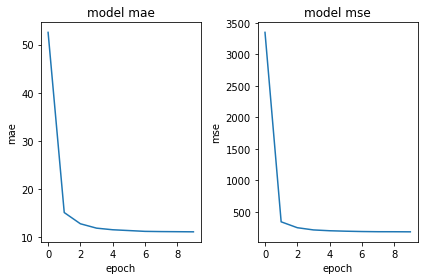

In [ ]:
plt.subplot(1, 2, 1)

plt.title('model mae')
plt.plot(history.history['mae'])
plt.xlabel("epoch")
plt.ylabel("mae")

plt.subplot(1, 2, 2)

plt.title('model mse')
plt.plot(history.history['mse'])
plt.xlabel("epoch")
plt.ylabel("mse")
plt.tight_layout()

plt.show()

Test MAE on test data

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test mae:", score[0])

Test mae: 10.73379135131836


### Questions
1. What preprocessing techniques did you use? Why?
    - OHE and Ordinal.\
    `OHE`ideal for `gender` and `lunch` columns, because this technique allows you to encode categorical data that does not have any particular order. \
    OE implies some order in the data, because this technique was used for the columns `race/ethnicity` and `parental level of education`.
2. Describe the fine-tuning process and how you reached your model architecture.
    - While I was selecting activation functions, I noticed that the linear function gives the maximum score improvement for the model, that is why I chose the linear one as the final layer for my model. Also, reducing the number of input layer improved `MAE` a little, this is the reason why the values were replaced in the test preparation course column instead of using `OHE`

# Task 2: CNN (40%)
For this task, you will be doing image classification:
- First, adapt your best model from Task 1 to work on this task, and
fit it on the new data. Then, evaluate its performance.
- After that, build a CNN model for image classification.
- Compare both models in terms of accuracy, number of parameters and speed of
inference (the time the model takes to predict 50 samples).

For the given data, you need to do proper data preprocessing and augmentation,
data loaders.
Then fine-tune your model architecture (number of layers, number of filters,
activation function, learning rate, momentum, regularization).

### Data
You will be working with the data in `triple_mnist.zip` for predicting 3-digit
numbers writen in the image. Each image contains 3 digits similar to the
following example (whose label is `039`):

![example](https://github.com/shaohua0116/MultiDigitMNIST/blob/master/asset/examples/039/0_039.png?raw=true)

## Parser for subdirectories

In [17]:
def parse(subdir):
  return tf.keras.preprocessing.image_dataset_from_directory(
      directory='triple_mnist/'+subdir,
      labels="inferred",
      label_mode="int",
      color_mode="grayscale",
      image_size=(64, 64),
      batch_size = 100
  )

## Get datasets from parser

In [18]:
train_ds = parse('train')

Found 64000 files belonging to 640 classes.


In [19]:
val_ds = parse('val')

Found 16000 files belonging to 160 classes.


In [20]:
test_ds = parse('test')

Found 20000 files belonging to 200 classes.


## Some additional stuff

Constant for class output

In [28]:
num_classes = 1000

Caching database for faster training

In [22]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## ANN adapting time

1. Rescale input data from 0..255 RGB to 0..1 scale
2. Adding `Flatten()` so our ANN can work with images
3. Adding Dense layer with `num_classes` number of outputs
Also compile with another loss function (for this task) and change metrics) 

In [23]:
#Creating base neural network
ann_m = keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    layers.Flatten(),
    layers.Dense(7, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(3, activation='linear'),
    tf.keras.layers.Dense(num_classes),
])

ann_m.compile(loss = 'sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.002),
              metrics=['accuracy'])
history = ann_m.fit(train_ds, epochs=10, batch_size=3, validation_data=val_ds)

Epoch 1/10
640/640 [==============================] - 38s 58ms/step - loss: 6.7905 - accuracy: 0.0013 - val_loss: 6.4615 - val_accuracy: 0.0000e+00
Epoch 2/10
640/640 [==============================] - 5s 9ms/step - loss: 6.4615 - accuracy: 0.0016 - val_loss: 6.4615 - val_accuracy: 0.0000e+00
Epoch 3/10
640/640 [==============================] - 5s 8ms/step - loss: 6.4615 - accuracy: 0.0016 - val_loss: 6.4615 - val_accuracy: 0.0000e+00
Epoch 4/10
640/640 [==============================] - 5s 8ms/step - loss: 6.4615 - accuracy: 0.0016 - val_loss: 6.4615 - val_accuracy: 0.0000e+00
Epoch 5/10
640/640 [==============================] - 9s 13ms/step - loss: 6.4615 - accuracy: 0.0016 - val_loss: 6.4615 - val_accuracy: 0.0000e+00
Epoch 6/10
640/640 [==============================] - 5s 8ms/step - loss: 6.4615 - accuracy: 0.0016 - val_loss: 6.4615 - val_accuracy: 0.0000e+00
Epoch 7/10
640/640 [==============================] - 6s 10ms/step - loss: 6.4615 - accuracy: 0.0016 - val_loss: 6.4615 -

## CNN building time

Creating model with a lot of hidden layers and processing functions
1. Random cropping of image
2. Rescaling from RGB to 0..1
3. 2D convolution layer with RELU activation function
4. Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (1.25) for each channel of the input.
5. Same as 4. but with 64 neurons
6. Flatten the input to 1D
7. Dense with 1024 neurons to better output of ≈1000 classes

In [35]:
cnn_m = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(num_classes,)
])

In [30]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
cnn_m.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

cnn_hist = cnn_m.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
  batch_size = 100
)

Epoch 1/10
640/640 [==============================] - 458s 714ms/step - loss: 7.2327 - accuracy: 3.5938e-04 - val_loss: 6.9078 - val_accuracy: 0.0000e+00
Epoch 2/10
640/640 [==============================] - 455s 711ms/step - loss: 6.9078 - accuracy: 3.1250e-05 - val_loss: 6.9078 - val_accuracy: 0.0000e+00
Epoch 3/10
 44/640 [=>............................] - ETA: 6:31 - loss: 6.9078 - accuracy: 0.0000e+00

In [ ]:
test_loss, test_acc = cnn_m.evaluate(test_ds, verbose=1)
print(f'Test loss:{test_loss}\n Test accuracy:{test_acc}')

In [ ]:
plt.subplot(1, 2, 1)

plt.title('models accuracy')
plt.plot(cnn_hist.history['accuracy'], label='CNN_ac')
plt.plot(history.history['accuracy'], label='ANN_ac')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)

plt.title('model val_ac')
plt.plot(cnn_hist.history['val_accuracy'], label = 'CNN_val_ac')
plt.plot(history.history['val_accuracy'], label = 'ANN_val_ac')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

### Questions
1. What preprocessing techniques did you use? Why?
    - Labels were encoded as integer for `sparse_categorical_crossentropy` loss and also better learning performance.
2. What data augmentation techniques did you use?
    - Random cropping in my opinion is enough for such dataset.
3. Describe the fine-tuning process and how you reached your final CNN model.
    - *Answer*

# Task 3: Decision Trees and Ensemble Learning (15%)

For the `loan_data.csv` data, predict if the bank should give a loan or not.
You need to do the following:
- Fine-tune a decision tree on the data
- Fine-tune a random forest on the data
- Compare their performance
- Visualize your DT and one of the trees from the RF

For evaluating your models, do $80/20$ train test split.

### Data
- `credit.policy`: Whether the customer meets the credit underwriting criteria.
- `purpose`: The purpose of the loan.
- `int.rate`: The interest rate of the loan.
- `installment`: The monthly installments owed by the borrower if the loan is funded.
- `log.annual.inc`: The natural logarithm of the self-reported annual income of the borrower.
- `dti`: The debt-to-income ratio of the borrower.
- `fico`: The FICO credit score of the borrower.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance.
- `revol.util`: The borrower's revolving line utilization rate.

In [ ]:
import tensorflow_decision_forests as tfdf

In [ ]:
df = pd.read_csv(path+'loan_data.csv')
df.head()
n_df = OHE(df,['purpose'])

In [ ]:
train_df, test_df = train_test_split(n_df, test_size=0.2, stratify=df["credit.policy"], random_state=42)
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="credit.policy")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="credit.policy")

In [ ]:
RF = tfdf.keras.RandomForestModel()

RF.compile(
    metrics=["accuracy"])

# Train the model.

RF.fit(
    x=train_ds,
    )

Use /tmp/tmpn_w60dtc as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.292062. Found 7662 examples.
Training model...
Model trained in 0:00:02.214582
Compiling model...
Model compiled.


In [ ]:
# Specify and train the model.
DT = tfdf.keras.GradientBoostedTreesModel(
    categorical_algorithm="ONE_HOT",
    task=tfdf.keras.Task.CLASSIFICATION,
)
DT.compile( metrics=["accuracy"])
DT.fit(
    x=train_ds,
    )

Use /tmp/tmpjm7tdf7v as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.279568. Found 7662 examples.
Training model...
Model trained in 0:00:04.614422
Compiling model...
Model compiled.


In [ ]:
# Evaluate both models
print('RF eval:')
evaluation = RF.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

print()
print('DT eval:')
evaluation = DT.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

RF eval:
2/2 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 0.9875

loss: 0.0000
accuracy: 0.9875

DT eval:
2/2 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.9932

loss: 0.0000
accuracy: 0.9932


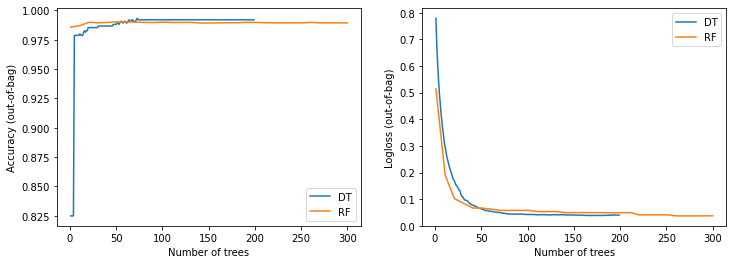

In [ ]:
DTlogs = DT.make_inspector().training_logs()
RFlogs = RF.make_inspector().training_logs()
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)

plt.plot([log.num_trees for log in DTlogs], [log.evaluation.accuracy for log in DTlogs])
plt.plot([log.num_trees for log in RFlogs], [log.evaluation.accuracy for log in RFlogs])
plt.legend(['DT', 'RF',], loc='lower right')
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)

plt.plot([log.num_trees for log in DTlogs], [log.evaluation.loss for log in DTlogs])
plt.plot([log.num_trees for log in RFlogs], [log.evaluation.loss for log in RFlogs])
plt.legend(['DT', 'RF',], loc='upper right')
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [ ]:
tfdf.model_plotter.plot_model_in_colab(DT, tree_idx=0, max_depth=500)

In [ ]:
tfdf.model_plotter.plot_model_in_colab(RF, tree_idx=0, max_depth=500)

### Questions
1. How did the DT compare to the RF in performance? Why?
    - 
2. After fine-tuning, how does the max depth in DT compare to RF? Why?
    - Random forest has too deep structure, it's overfitting, so it badly predict new data. DT has max_depth == 6, on the beginning it performed worse, but getting more trees increased its performance
3. What is ensemble learning? What are its pros and cons?
    - *Answer*
4. Briefly explain 2 types of boosting methods and 2 types of bagging methods.
Which of these categories does RF fall under?
    - *Answer*

# Task 4: Domain Gap (15%)

Evaluate your CNN model from task 2 on SVHN data without retraining your model.

In [ ]:
# TODO: Implement task 4

### Questions
1. How did your model perform? Why is it better/worse?
    - *Answer*
2. What is domain gap in the context of ML?
    - *Answer*
3. Suggest two ways through which the problem of domain gap can be tackled.
    - *Answer*